<a href="https://colab.research.google.com/github/Mmarlo5/psychic-doodle/blob/main/Problem_Set_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time, os, sys, re
import zipfile, json, datetime, string
import numpy as np
from statistics import *


import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler


import urllib


from google.colab import files

import webbrowser                                                                      
import folium as f                                                                     
from folium.plugins import MarkerCluster, HeatMap   


! pip install geopandas
import geopandas as gpd 

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 10.8 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [29]:
dat=pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/abortion%20sample%20data.csv")

In [32]:
dat.columns #list var names

Index(['ageban', 'WEIGHT', 'female', 'white', 'nonwhite', 'year'], dtype='object')

In [33]:
dat.head(2)
dat.tail(2)

,ageban,WEIGHT,female,white,nonwhite,year
0,65+,0.400633,1,1,0,2016
1,65+,1.090437,0,1,0,2016


,ageban,WEIGHT,female,white,nonwhite,year
36,50-64,0.475058,1,1,0,2016
37,65+,0.323125,0,1,0,2016


In [34]:
dat.ageban

0       65+
1       65+
2     50-64
3       65+
4     30-49
5       65+
6     30-49
7     18-29
8     30-49
9       65+
10      65+
11      65+
12    30-49
13    50-64
14      65+
15    50-64
16      65+
17    18-29
18      65+
19      65+
20    50-64
21      65+
22    50-64
23    50-64
24    30-49
25      65+
26      65+
27      65+
28    50-64
29    30-49
30    30-49
31      65+
32      65+
33    50-64
34      65+
35    50-64
36    50-64
37      65+
Name: ageban, dtype: object

In [35]:
dat.white

0      1
1      1
2      1
3      1
4      1
5      1
6      0
7      0
8      0
9      0
10     1
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     0
20     1
21     1
22     1
23     1
24     0
25     1
26     1
27     1
28    .a
29     1
30     1
31     0
32     1
33     1
34     1
35     1
36     1
37     1
Name: white, dtype: object

In [36]:
dat #get spreadsheet view: can sort on cols, filter, and copy

,ageban,WEIGHT,female,white,nonwhite,year
0,65+,0.400633,1,1,0,2016
1,65+,1.090437,0,1,0,2016
2,50-64,0.405421,0,1,0,2016
3,65+,0.203931,0,1,0,2016
4,30-49,0.542096,0,1,0,2016
5,65+,0.203931,0,1,0,2016
6,30-49,0.895754,0,0,1,2016
7,18-29,3.542089,1,0,1,2016
8,30-49,1.252389,0,0,1,2016
9,65+,0.786650,0,0,1,2016


In [37]:
dat["ageban"][0:3] #subset or slice

0      65+
1      65+
2    50-64
Name: ageban, dtype: object

In [38]:
dat ["nonwhite"] 

0      0
1      0
2      0
3      0
4      0
5      0
6      1
7      1
8      1
9      1
10     0
11     0
12     1
13     0
14     0
15     0
16     0
17     0
18     1
19     1
20     0
21     0
22     0
23     0
24     1
25     0
26     0
27     0
28    .a
29     0
30     0
31     1
32     0
33     0
34     0
35     0
36     0
37     0
Name: nonwhite, dtype: object

In [39]:
import matplotlib.pyplot as plt
import numpy as np

[Text(0, 0.5, 'voltage (mV)'),
 Text(0.5, 0, 'time (s)'),
 Text(0.5, 1.0, 'About as simple as it gets, folks')]

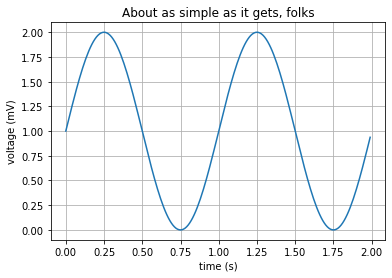

In [40]:

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()